In [11]:
import warnings
warnings.filterwarnings('ignore')

import math as m
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

from statsmodels.graphics.tsaplots import plot_pacf, plot_acf
import statsmodels.api as sm

In [12]:
df_ativos = pd.read_csv("../dados/df_ativos/df_ativos_raw.csv",index_col = 0)

In [13]:
df_ativos

,Ativo,Open,High,Low,Close,Adj Close,Volume
2014-09-17,BTC-USD,465.864014,468.174011,452.421997,457.334015,457.334015,21056800
2014-09-18,BTC-USD,456.859985,456.859985,413.104004,424.440002,424.440002,34483200
2014-09-19,BTC-USD,424.102997,427.834991,384.532013,394.795990,394.795990,37919700
2014-09-20,BTC-USD,394.673004,423.295990,389.882996,408.903992,408.903992,36863600
2014-09-21,BTC-USD,408.084991,412.425995,393.181000,398.821014,398.821014,26580100
...,...,...,...,...,...,...,...
2021-08-16,DASH-USD,215.874359,216.735474,199.934326,202.093277,202.093277,355403656
2021-08-17,DASH-USD,201.299622,211.345093,186.345810,194.603912,194.603912,424686878
2021-08-18,DASH-USD,194.697891,213.366608,187.295181,210.221527,210.221527,432819051
2021-08-19,DASH-USD,209.888916,220.769531,199.233871,220.021484,220.021484,397627914


In [14]:
ativos = list(df_ativos['Ativo'].unique())
ativos

['BTC-USD',
 'ETH-USD',
 'ADA-USD',
 'BNB-USD',
 'USDT-USD',
 'XRP-USD',
 'DOGE-USD',
 'BCH-USD',
 'LINK-USD',
 'LTC-USD',
 'XLM-USD',
 'ETC-USD',
 'FIL-USD',
 'THETA-USD',
 'TRX-USD',
 'XMR-USD',
 'EOS-USD',
 'NEO-USD',
 'MKR-USD',
 'XTZ-USD',
 'MIOTA-USD',
 'DASH-USD']


BTC-USD:


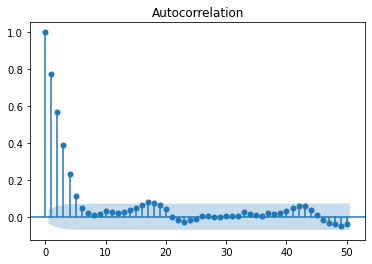


ETH-USD:


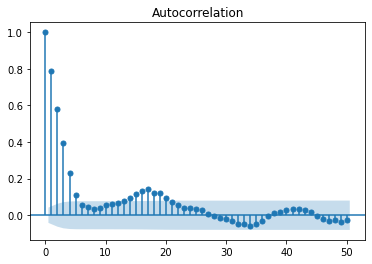


ADA-USD:


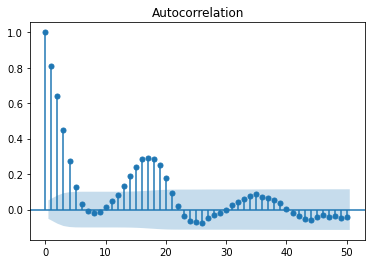


BNB-USD:


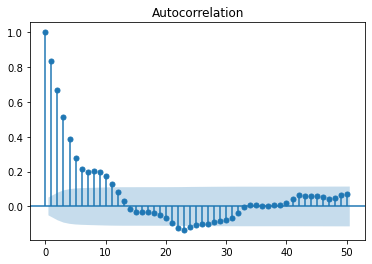


USDT-USD:


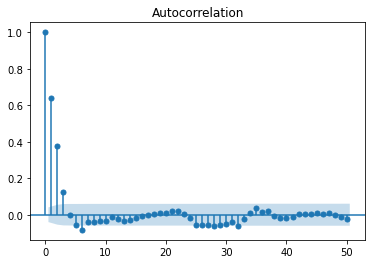


XRP-USD:


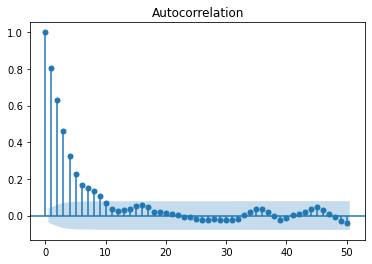


DOGE-USD:


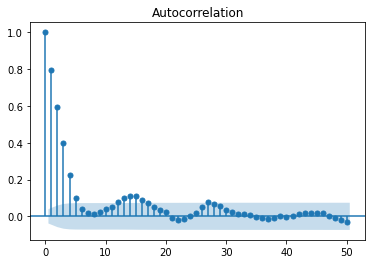


BCH-USD:


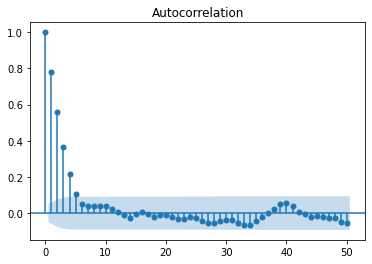


LINK-USD:


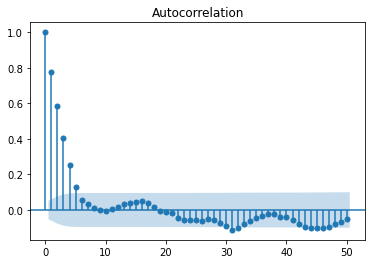


LTC-USD:


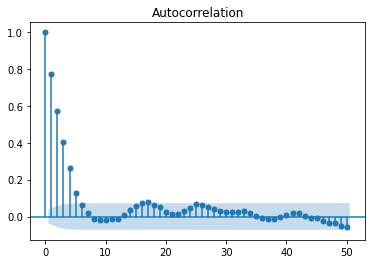


XLM-USD:


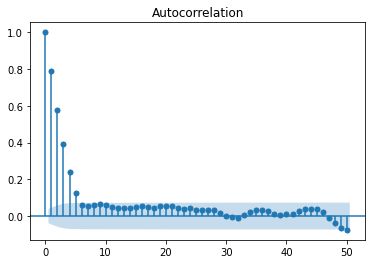


ETC-USD:


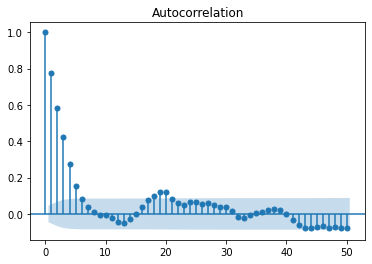


FIL-USD:


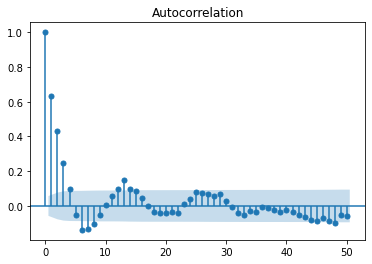


THETA-USD:


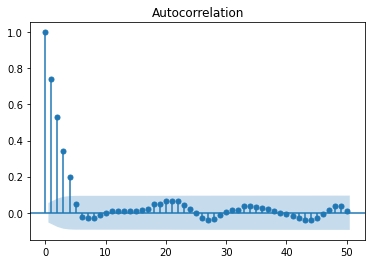


TRX-USD:


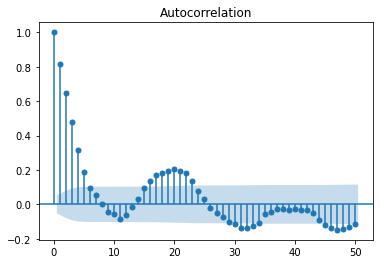


XMR-USD:


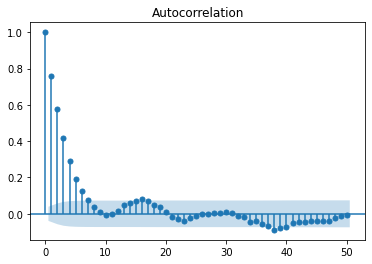


EOS-USD:


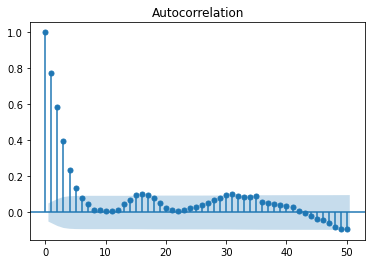


NEO-USD:


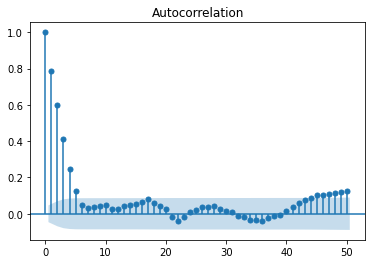


MKR-USD:


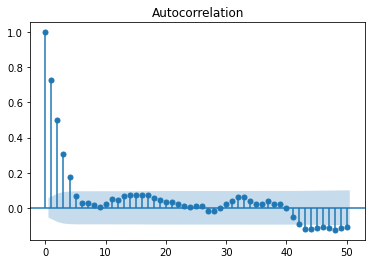


XTZ-USD:


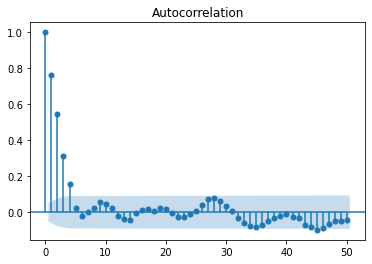


MIOTA-USD:


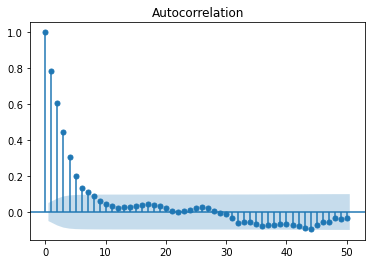


DASH-USD:


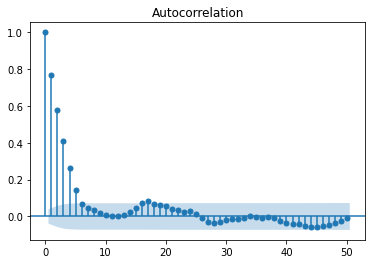

In [15]:
for ativo in ativos:
  print(f"\n{ativo}:")
  df = df_ativos[df_ativos['Ativo']==ativo]
  ln_close = np.log(df['Close'])
  rolmean_log = ln_close.rolling(window=7).mean() #A janela é fator primordial para a análise.
  acf = ln_close - rolmean_log
  acf.dropna(inplace = True)
  plot_acf(acf, lags=50)
  plt.show()

De forma geral, parece ser suficiente considerar até 4 dias passados como features (nossa modelagem contempla relações de preços de fechamento passados dessa ordem).